# Project: Predicting HR Employee Attrition


### Calling the required libraries

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


# For Visualizations
%matplotlib inline
import seaborn as sns
sns.set()
%pwd

#For modeling
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB

#For Statistics
import statsmodels.api as sm
from scipy import stats

# Ignoring warnings
warnings.filterwarnings("ignore")    

###      

## Exploratory Data Analysis

#### Drawings chart to get any insights as to why employees are leaving the organization. Trying to assess which attributes are the most correlated to employees leaving the organization. This will be the basis for the prediction model

In [3]:
# Importing the dataset
path_mac ='/Users/brunoteixeira/HR_DS.csv'

path=path_mac

ds = pd.read_csv(path, sep=",", encoding="latin")

In [4]:
# Setting Attrition to 1 or 0, instead of Yes and No from the beginning
target_map = {'Yes':1, 'No':0}
ds["Attrition"] = ds["Attrition"].apply(lambda x: target_map[x])
inplace=True

In [5]:
ds.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
Attrition,1470.0,0.161224,0.367863,0.0,0.00,0.0,0.00,1.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0


In [7]:
# Checking if we have null values
display(ds.isnull().any())
print ('No null values found')

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

No null values found


In [8]:
# Breaking down the columns by type
ds.columns.to_series().groupby(ds.dtypes).groups

{dtype('int64'): Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
        'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
        'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
        'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
        'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
        'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager'],
       dtype='object'),
 dtype('O'): Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
        'MaritalStatus', 'Over18', 'OverTime'],
       dtype='object')}

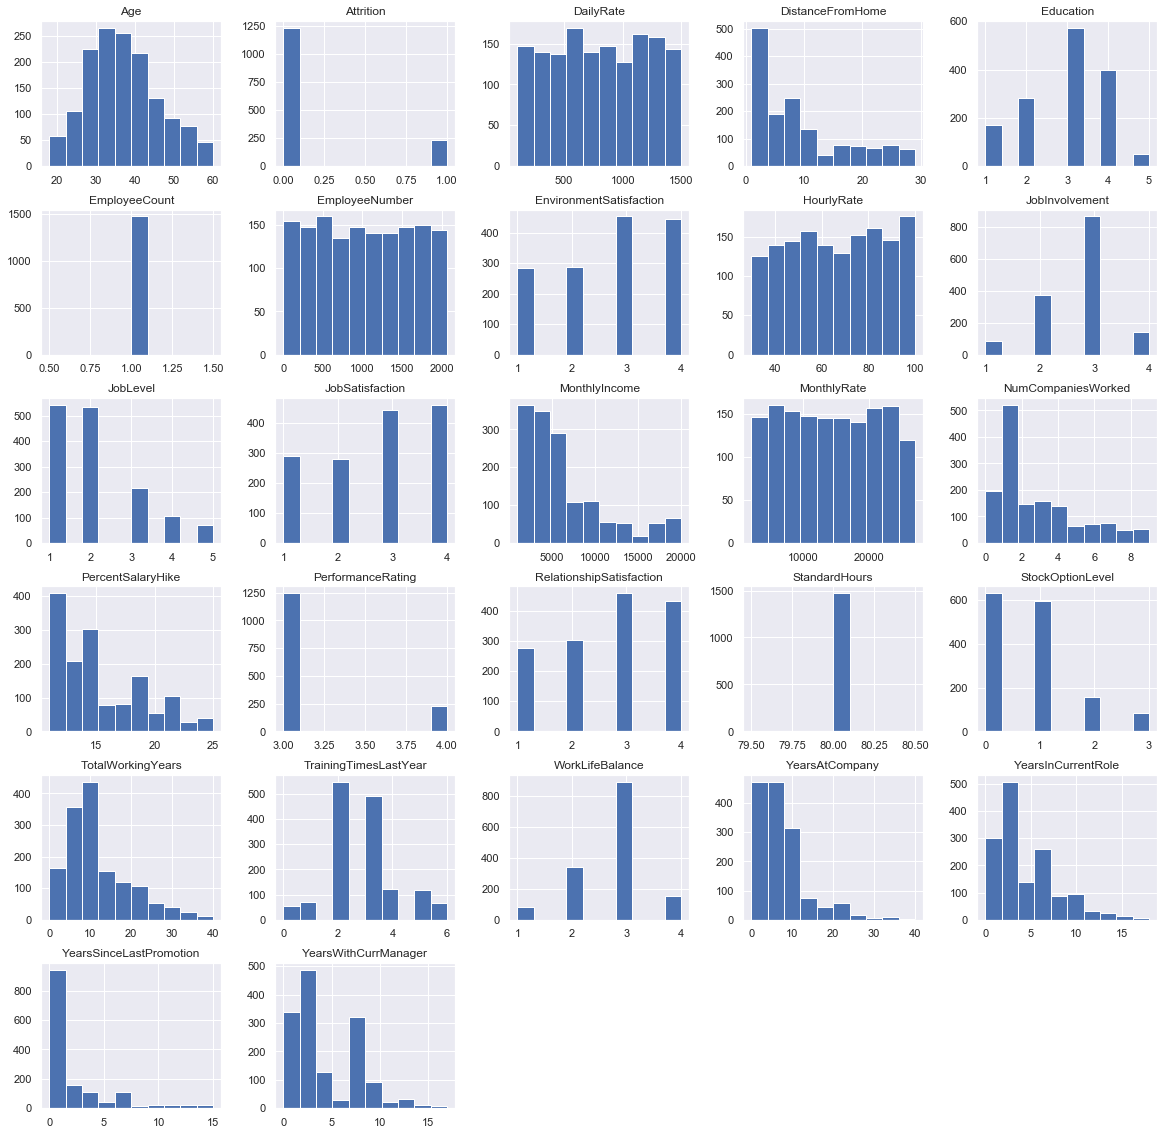

In [9]:
# Plotting Historgram for data analysis

ds.hist(figsize=(20,20))
plt.show()

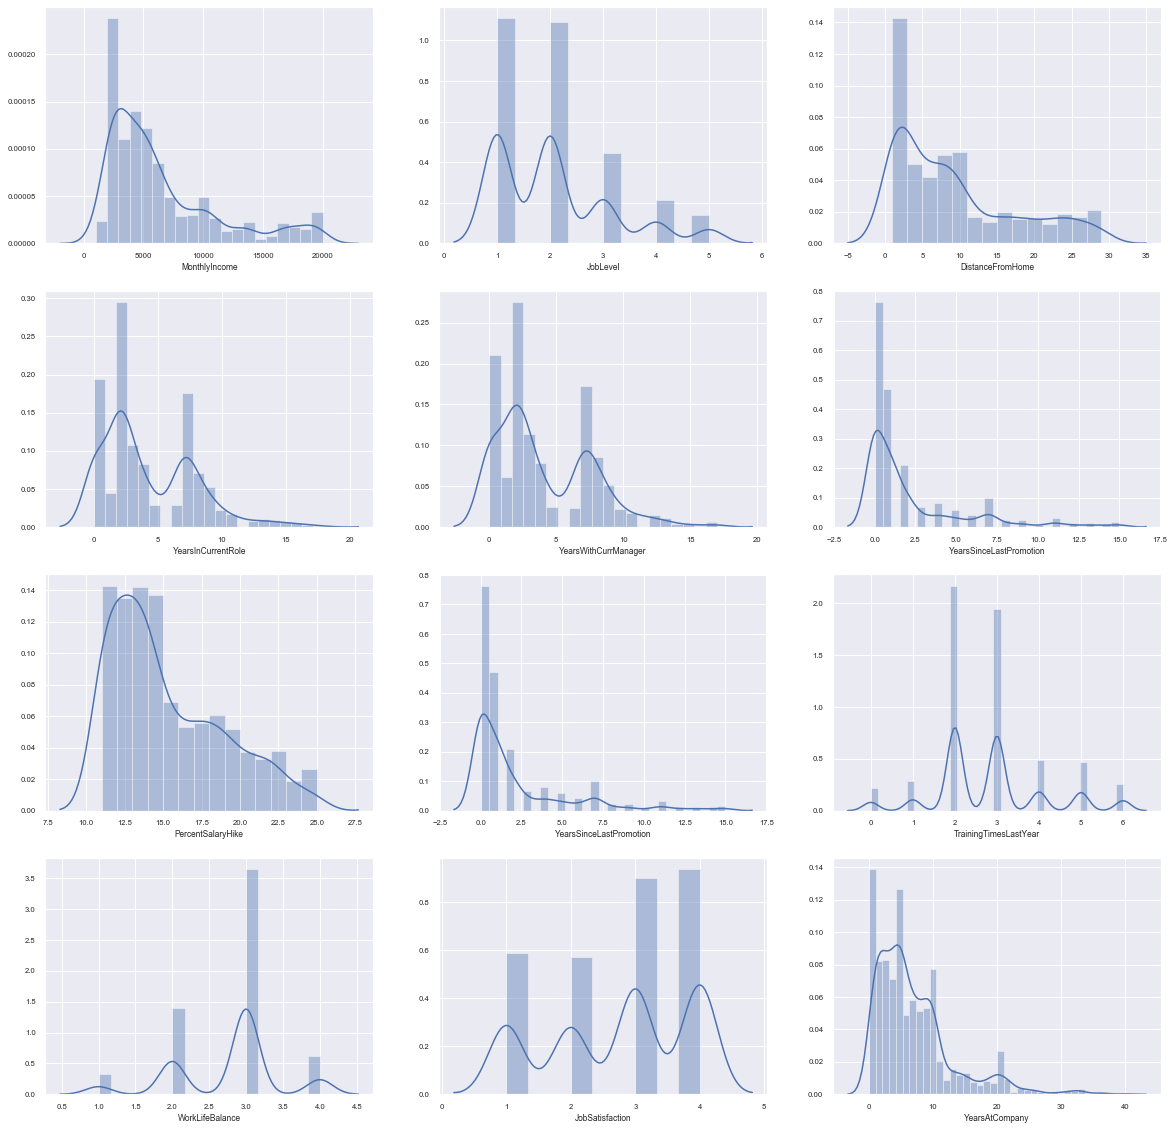

In [10]:
# Looking at specific variables for a more in-depth look

sns.set(font_scale=0.7) 
fig,ax = plt.subplots(4,3, figsize=(20,20))              
sns.distplot(ds['MonthlyIncome'], ax = ax[0,0]) 
sns.distplot(ds['JobLevel'], ax = ax[0,1]) 
sns.distplot(ds['DistanceFromHome'], ax = ax[0,2]) 
sns.distplot(ds['YearsInCurrentRole'], ax = ax[1,0]) 
sns.distplot(ds['YearsWithCurrManager'], ax = ax[1,1]) 
sns.distplot(ds['YearsSinceLastPromotion'], ax = ax[1,2]) 
sns.distplot(ds['PercentSalaryHike'], ax = ax[2,0]) 
sns.distplot(ds['YearsSinceLastPromotion'], ax = ax[2,1]) 
sns.distplot(ds['TrainingTimesLastYear'], ax = ax[2,2]) 
sns.distplot(ds['WorkLifeBalance'], ax = ax[3,0]) 
sns.distplot(ds['JobSatisfaction'], ax = ax[3,1]) 
sns.distplot(ds['YearsAtCompany'], ax = ax[3,2]) 
plt.show()

In [11]:
# Checking Datatypes
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome          

In [12]:
# Checking unique numbers for each field
NonUnique = ds.nunique()
NonUnique = NonUnique.sort_values()
NonUnique

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

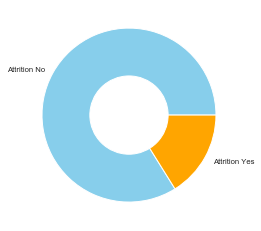

Attrition
0    0.838776
1    0.161224
Name: EmployeeCount, dtype: float64

In [13]:
# Plotting a doughnut chart with attrition distribution
names='Attrition No', 'Attrition Yes'
size=ds.groupby('Attrition')['EmployeeCount'].sum() / ds.EmployeeCount.sum()
 
# Give color names
plt.pie(size, labels=names, labeldistance=1.1, colors=['skyblue','orange'])
p=plt.gcf()

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.45, color='white')
p.gca().add_artist(my_circle)
plt.show()

ds.groupby('Attrition')['EmployeeCount'].sum() / ds.EmployeeCount.sum()

Dataset seems fine with no null values nor any major transformations needed. The only thing is that dataset seems <b>unbalanced</b> given that dataset has 16% of Attrition = Yes and 84% Attrition = No. Predictive models <b>may potentially need some balancing</b> to improve accuracy and recall. 

We will use a technique SMOTE to treat the imbalance in data (oversampling).

#### Pairplotting to spot any patterns or correlations in the dataset

In [14]:
# Pairplotting. Note: Takes a long time to run! 
#sns.pairplot(ds, hue='Attrition', palette='Set2')


#### Plotting a correlation map for all numeric variables
<b>Note: </b> Correlation coeficcients only measure linear correlations. 

In [15]:
# Getting Pearson correlation without any condition
correlation_matrix = ds.corr()
correlation_matrix

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,NaN,-0.010577,-0.103369,-0.006846,-0.130016,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976


In [16]:
# List Highest Correlation Pairs (Above 40% correlation)
sol = (correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
top = sol[sol>0.4]
top

JobLevel                 MonthlyIncome              0.950300
                         TotalWorkingYears          0.782208
PercentSalaryHike        PerformanceRating          0.773550
MonthlyIncome            TotalWorkingYears          0.772893
YearsAtCompany           YearsWithCurrManager       0.769212
                         YearsInCurrentRole         0.758754
YearsInCurrentRole       YearsWithCurrManager       0.714365
Age                      TotalWorkingYears          0.680381
TotalWorkingYears        YearsAtCompany             0.628133
YearsAtCompany           YearsSinceLastPromotion    0.618409
YearsInCurrentRole       YearsSinceLastPromotion    0.548056
JobLevel                 YearsAtCompany             0.534739
MonthlyIncome            YearsAtCompany             0.514285
YearsSinceLastPromotion  YearsWithCurrManager       0.510224
Age                      JobLevel                   0.509604
                         MonthlyIncome              0.497855
TotalWorkingYears       

In [17]:
# List Highest Correlation Pairs (Below 40% correlation)
sol = (correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
bottom = sol[sol<0.4]
bottom

JobLevel       YearsInCurrentRole         0.389447
               YearsWithCurrManager       0.375281
MonthlyIncome  YearsInCurrentRole         0.363818
JobLevel       YearsSinceLastPromotion    0.353885
MonthlyIncome  YearsSinceLastPromotion    0.344978
                                            ...   
Age            Attrition                 -0.159205
Attrition      MonthlyIncome             -0.159840
               YearsInCurrentRole        -0.160545
               JobLevel                  -0.169105
               TotalWorkingYears         -0.171063
Length: 281, dtype: float64

In [18]:
# Getting Pearson correlation above 0.8 or below -0.8
conditional_corr = correlation_matrix[(correlation_matrix >= 0.4) | (correlation_matrix <= -0.4)]
conditional_corr

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.680381,NaN,NaN,NaN,NaN,NaN,NaN
Attrition,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnvironmentSatisfaction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HourlyRate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JobInvolvement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


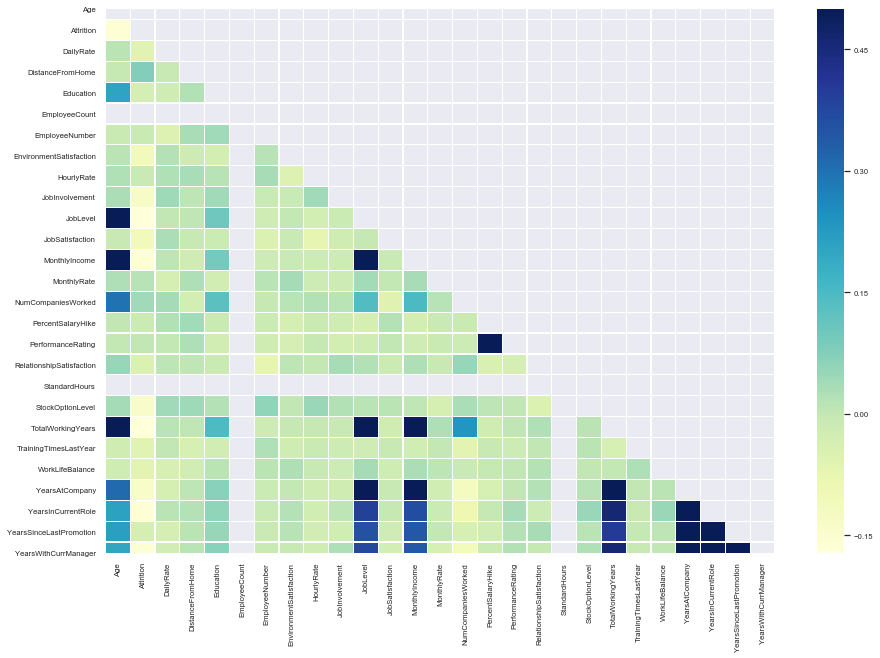

In [19]:
# Masking the correlation_matrix
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

As shown above, <b>TotalWorkingYears</b>, <b>JobLevel</b>, and <b> YearsInCurrentRole</b> are negatively correlated to Attrition. On the other hand, <b>MonthlyRate</b>, <b> NumberofCompaniesWorked</b> and <b> DistanceFromHome</b> are positively correlated to Attrition

Now let's analyze correlations specifically with Attrition:

In [20]:
# Correlation between Attrition and all the other features:
cor1 = ds[ds.columns[:]].corr()['Attrition'][:]
cor1 = cor1.sort_values(ascending=False)
cor1

Attrition                   1.000000
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
EmployeeCount                    NaN
StandardHours                    NaN
N

In [21]:
# Creating buckets of 0-10, 10-20,20-30 for variable DistanceFromHome
ds['DistanceFromHomeRange']=pd.cut(ds['DistanceFromHome'],[0,10,20,30])
ds.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHomeRange
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,"(0, 10]"
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,"(0, 10]"
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,"(0, 10]"
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,"(0, 10]"
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,"(0, 10]"
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,80,0,8,2,2,7,7,3,6,"(0, 10]"
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,80,3,12,3,2,1,0,0,0,"(0, 10]"
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,80,1,1,2,3,1,0,0,0,"(20, 30]"
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,80,0,10,2,3,9,7,1,8,"(20, 30]"
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,80,2,17,3,2,7,7,7,7,"(20, 30]"


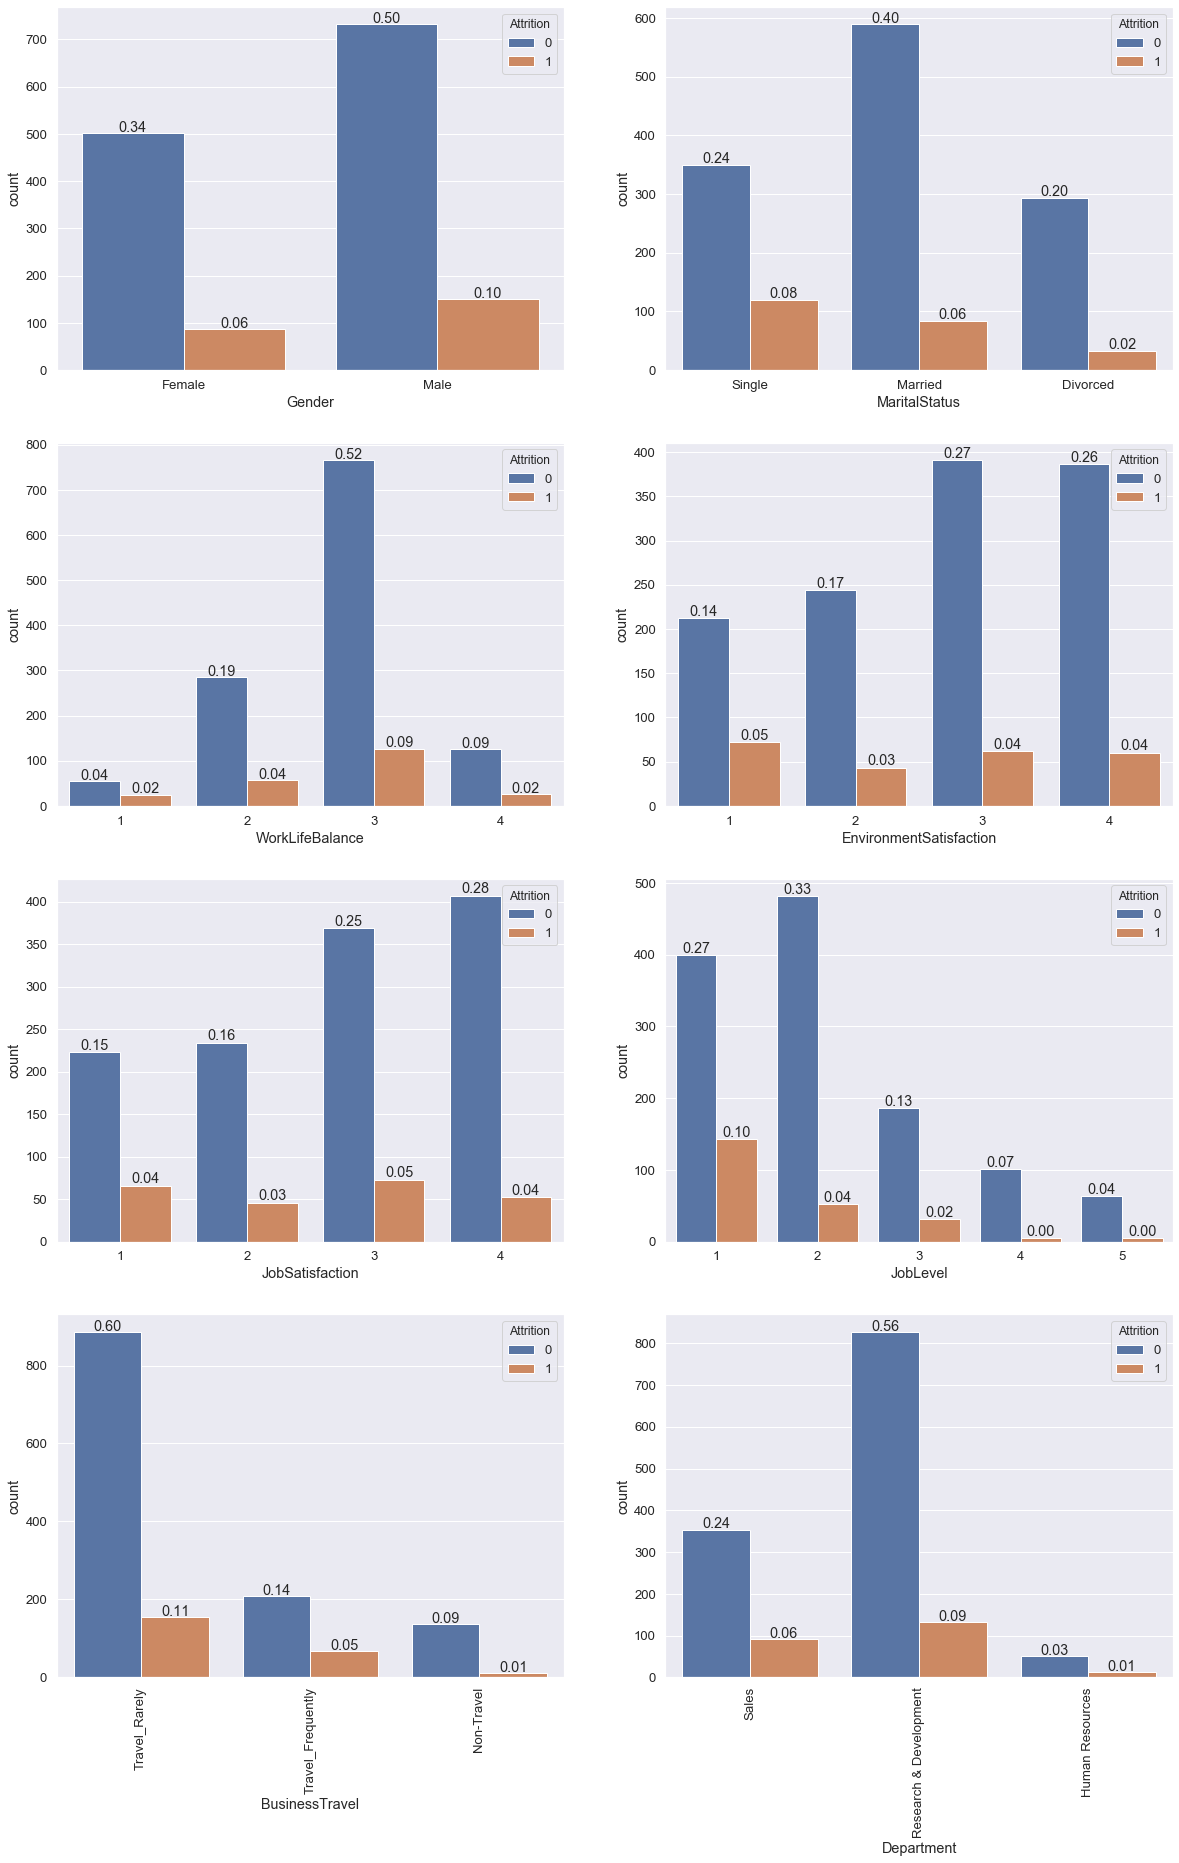

In [22]:
total_records= len(ds)

new_columns = ["Gender","MaritalStatus","WorkLifeBalance","EnvironmentSatisfaction","JobSatisfaction",
               "JobLevel","BusinessTravel","Department"]
sns.set(font_scale=1.2)
plt.figure(figsize=(20,8))
j=0
for i in new_columns:
    j= j+1
    plt.subplot(4,2,j)
    
   
    ax1 = sns.countplot(data=ds,x= i,hue="Attrition")
    if(j==8 or j== 7):
        plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total_records,0),
                ha="center",rotation=0) 

# Custom the subplot layout
plt.subplots_adjust(bottom=-0.9, top=2)
plt.show()

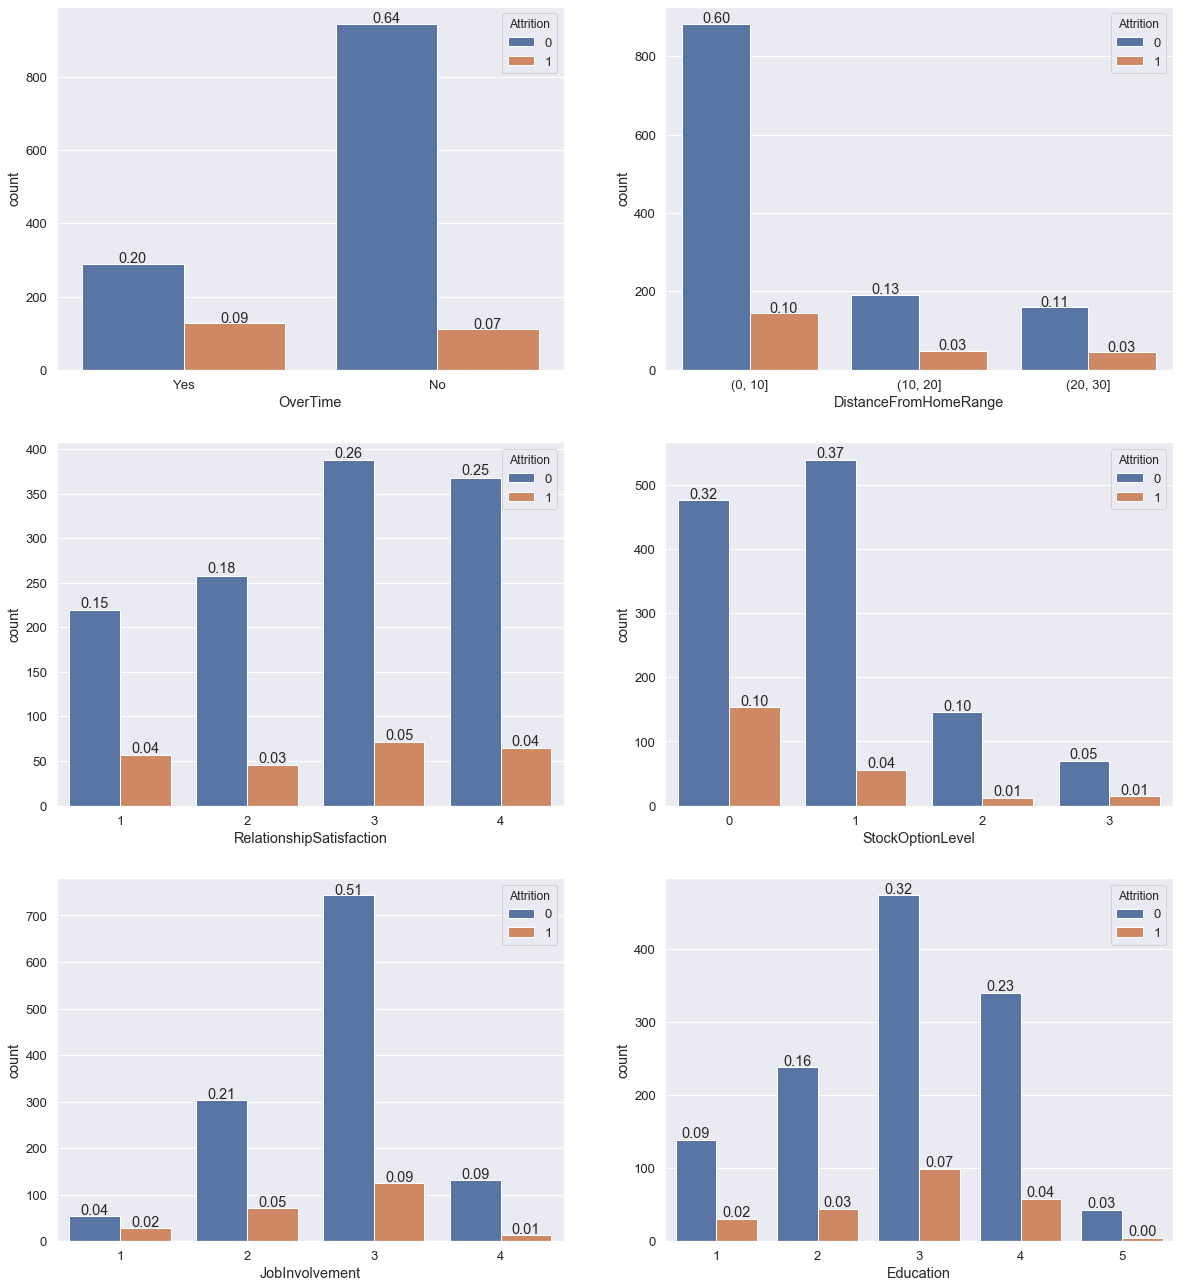

In [23]:
total_records= len(ds)

new_columns = ["OverTime","DistanceFromHomeRange","RelationshipSatisfaction","StockOptionLevel",
               "JobInvolvement","Education"]
sns.set(font_scale=1.2)
plt.figure(figsize=(20,8))
j=0
for i in new_columns:
    j= j+1
    plt.subplot(4,2,j)
    
   
    ax1 = sns.countplot(data=ds,x= i,hue="Attrition")
    if(j==8 or j== 7):
        plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total_records,0),
                ha="center",rotation=0) 

# Custom the subplot layout
plt.subplots_adjust(bottom=-0.9, top=2)
plt.show()

### After observing the charts above, a couple of things stand out: 

- Employees that do OverTime tend to have a much higher Attrition rate.
- Atrittion levels are higher in Male and Single marital status. 
- Job Level 1 attrition rates is  high compared to other job levels
- EnvironmentSatisfaction Level 1 has a higher attrition rate compared to others.

At a first glance, Attrition rates tend to be higher when employees that do OverTime, are Male, work in the Sales Deparment and have a JobSatisfaction of 1



### Plotting additional charts to visualize analyze data

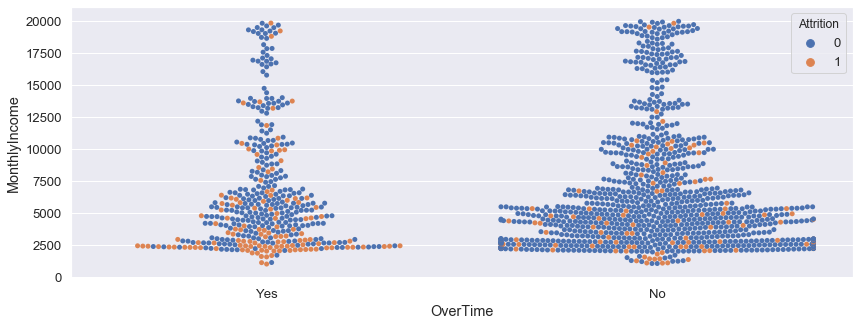

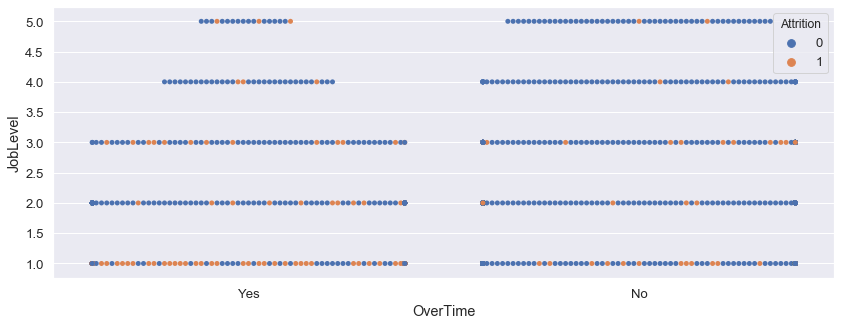

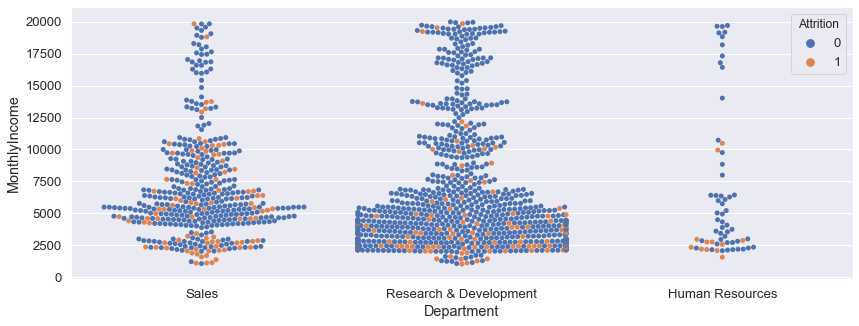

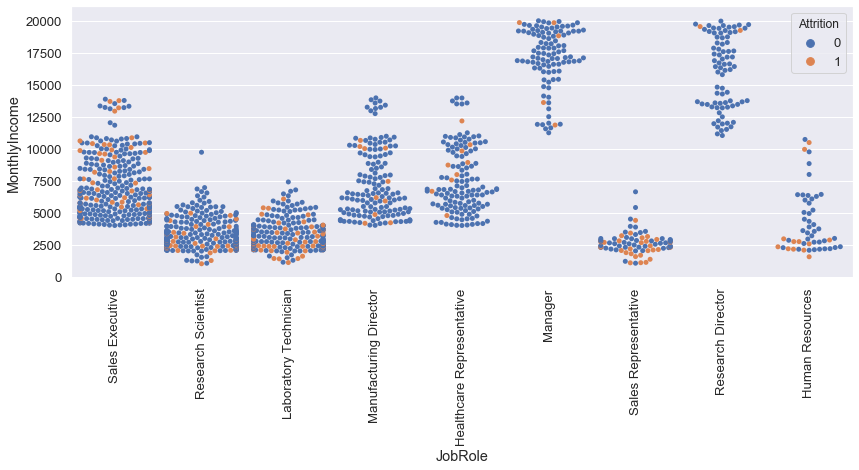

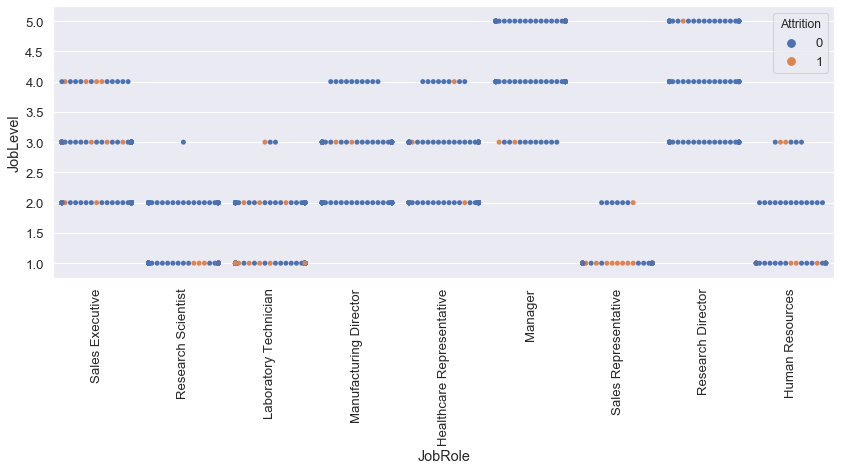

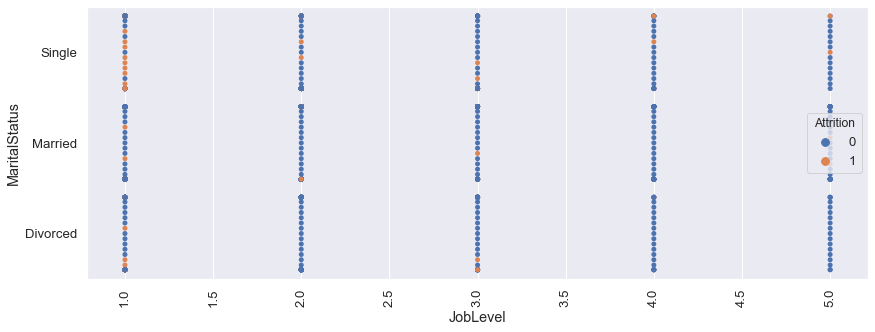

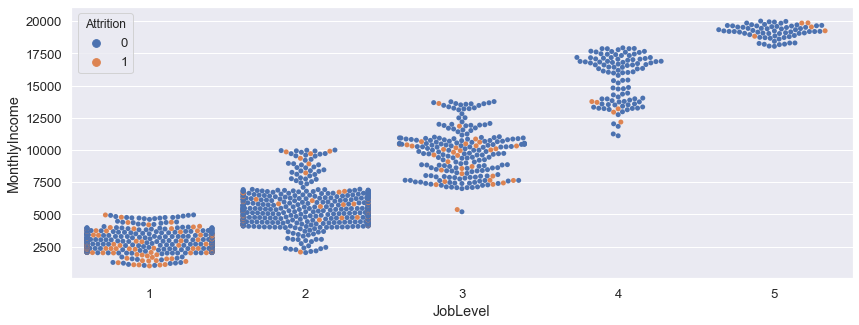

In [24]:
# Plotting a series of charts for further analysis
plt.figure(figsize=(14,5))

sns.swarmplot(x="OverTime", y="MonthlyIncome", hue="Attrition", data=ds);
plt.show()

plt.figure(figsize=(14,5))
sns.swarmplot(x="OverTime", y="JobLevel", hue="Attrition", data=ds);
plt.show()

plt.figure(figsize=(14,5))
sns.swarmplot(x="Department", y="MonthlyIncome", hue="Attrition", data=ds);
plt.show()

plt.figure(figsize=(14,5))
sns.swarmplot(x="JobRole", y="MonthlyIncome", hue="Attrition", data=ds);
plt.xticks( rotation=90 )
plt.show()

plt.figure(figsize=(14,5))
sns.swarmplot(x="JobRole", y="JobLevel", hue="Attrition", data=ds);
plt.xticks( rotation=90 )
plt.show()

plt.figure(figsize=(14,5))
sns.swarmplot(x="JobLevel", y="MaritalStatus", hue="Attrition", data=ds);
plt.xticks( rotation=90 )
plt.show()

plt.figure(figsize=(14,5))
sns.swarmplot(x="JobLevel", y="MonthlyIncome", hue="Attrition", data=ds);
plt.show()



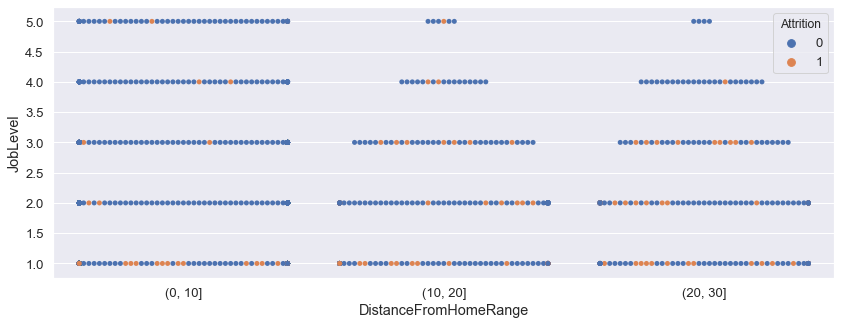

In [25]:
plt.figure(figsize=(14,5))
sns.swarmplot(x="DistanceFromHomeRange", y="JobLevel", hue="Attrition", data=ds);
plt.show()

## An in-depth look at DistanceFromHome  

### Tweaking DistanceFromHome into ranges for better analysis

In [26]:
# Creating buckets of 0-10, 10-20,20-30 for variable DistanceFromHome
#ds['DistanceFromHomeRange']=pd.cut(ds['DistanceFromHome'],[0,10,20,30,40])
#ds.head(10)

Overall DistanceFromHome looks like this:

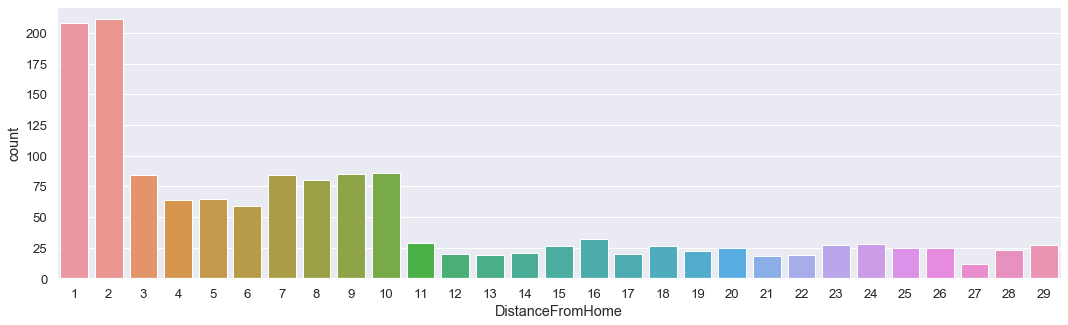

In [27]:
plt.subplots(figsize=(18,5))
sns.countplot(ds.DistanceFromHome)

Distance from Home where employees left the organization (Attrition = Yes) looks like this:

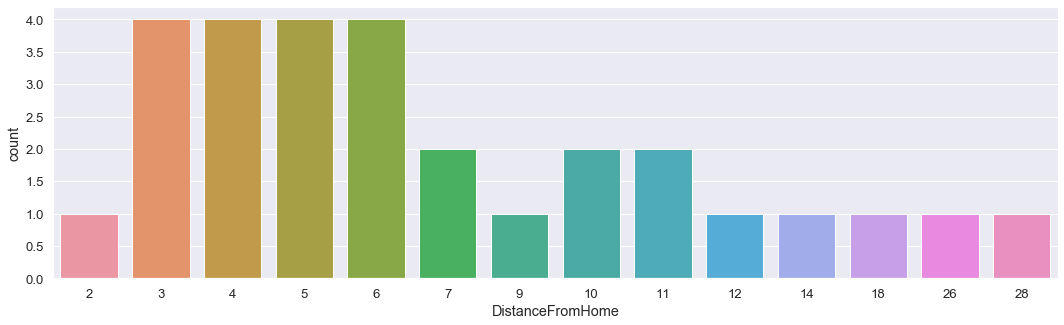

In [28]:
Distance_Attrition_Yes = ds[ds['Attrition'] == 1]['DistanceFromHome'].value_counts()
plt.subplots(figsize=(18,5))
sns.countplot(Distance_Attrition_Yes)

In [29]:
print("Distance from home for employees to get to work is from {} to {} km.".format(
    ds['DistanceFromHome'].min(), ds['DistanceFromHome'].max()))

print('Average distance from home for currently active employees: {:.2f} km  and ex-employees: {:.2f} km'.format(
    ds[ds['Attrition'] == 0]['DistanceFromHome'].mean(), ds[ds['Attrition'] == 1]['DistanceFromHome'].mean()))


Distance from home for employees to get to work is from 1 to 29 km.
Average distance from home for currently active employees: 8.92 km  and ex-employees: 10.63 km


##### Using a  KDE (kernel density estimation) plot by current employees (Attrition = No) and Ex-Employees (Attrition = Yes). A kernel density estimation (KDE) estimates the probability density function of a variable. This allows us to identify if there is a correlation between the Distance from home and Attrition.

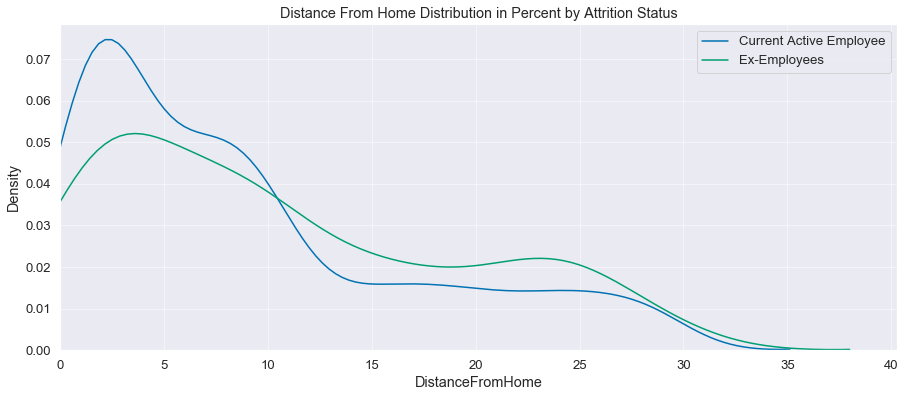

In [30]:
# Plotting a KDE (Kernel Desnsity Estimation) Plot 
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(ds.loc[ds['Attrition'] == 0, 'DistanceFromHome'], label = 'Current Active Employee')
sns.kdeplot(ds.loc[ds['Attrition'] == 1, 'DistanceFromHome'], label = 'Ex-Employees')
plt.xlabel('DistanceFromHome')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Distance From Home Distribution in Percent by Attrition Status')
plt.show()

Note: There is no apparent strong correlation between DistanceFromHome and Attrition, according to the KDE plot

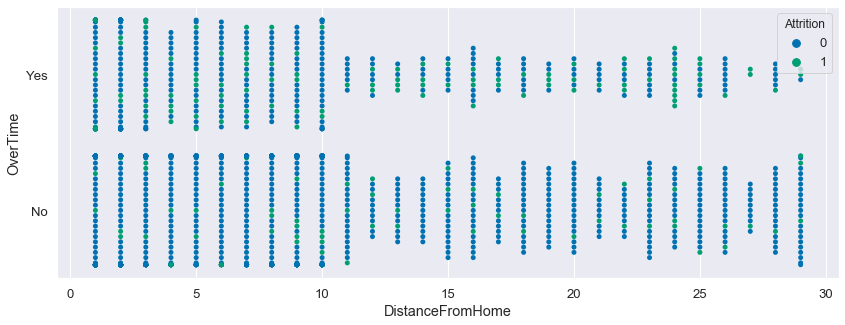

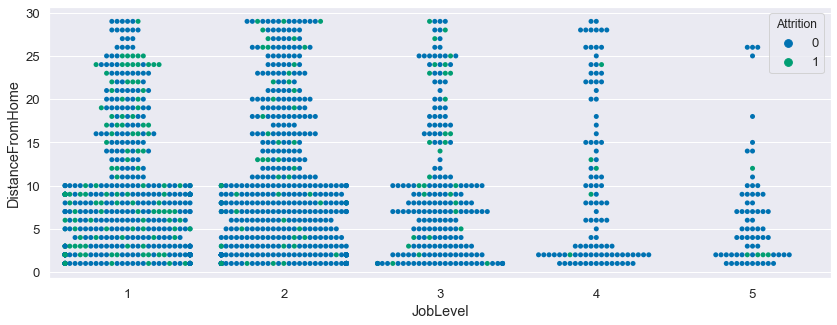

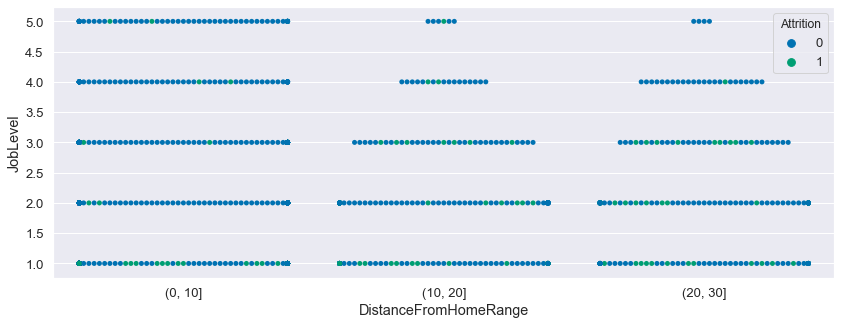

In [31]:
# An in-depth look at DistanceFromHome

plt.figure(figsize=(14,5))
sns.swarmplot(x="DistanceFromHome", y="OverTime", hue="Attrition", data=ds);
plt.show()

plt.figure(figsize=(14,5))
sns.swarmplot(x="JobLevel", y="DistanceFromHome", hue="Attrition", data=ds);
plt.show()

plt.figure(figsize=(14,5))
sns.swarmplot(x="DistanceFromHomeRange", y="JobLevel", hue="Attrition", data=ds);
plt.show()


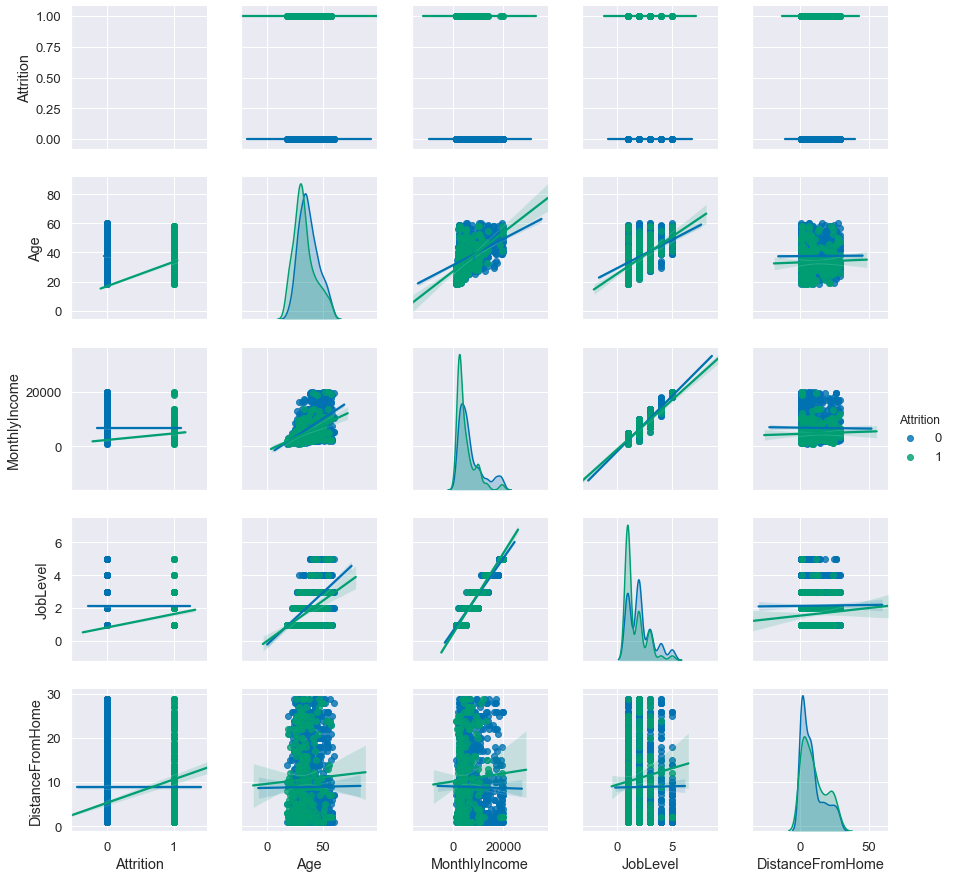

In [32]:
# Plotting the main variables
corr_cols= ['Attrition','Age','MonthlyIncome', 'JobLevel','DistanceFromHome']
sns.pairplot(ds[corr_cols],  kind="reg", diag_kind = "kde"  , hue = 'Attrition' )
plt.show()

###   
### Conclusions of the Exploratory Data Analysis and Visualizations  

- Dataset does not have any missing data values and all variables have the correct data type. There was no need for any major changes as the dataset is very clean.
- Some variables are irrelevant for the analysis and are about to be dropped. These are: EmployeeCount, EmplyeeNumber, StandardHours and Over18. 

- Attrition rate is reasonably higher in Employees that do Overtime and have a MonthylIncome of around 2500 € and belong to JobLevel 1.

- Attrition rate is high in "Sales" and "Research & Development" Departments, especially for JobLevel 1 on both  departments.

- DistanceFromHome does not seem to have a big impact on attrition as we can observe that there is a high attrition in JobLevel 1 in employees that live up to 10 km from home as well as above 10 km. 

- Around 10% of leavers left near their second work anniversary. Higher paid employees tend to have lower attrition.

- Employees that travel frequently have a higher tendency of leaving.

- Employees that have worked in previous companies show a higher proportion of leavers.

<b>In a nutshell, High Attrition rates are seen in: </b>
- Employees doing OverTime
- Single employees, belonging to the "Sales Representive" for JobLevel 1
- Laboratory Technicians for JobLevel 1 
- Sales Executives for JobLevels 2 and 3 and who have salary range of 7500 and 10000

### Pre-Processing our data

Before building our models, we now need to do the following: 

- Remove variables that are not relevant for the model as we have identified them before
- Treat the categorial variables we have (One-hot enconding)
- Use SMOTE (oversmapling) to treat the imbalance of the dataset (for Attrition Yes and No)

Dropping variables that are not relevant. 
Please note that the variables dropped below were a constant iterative exercise to enhance the model.

Taking some of the correlated variables from above, we are ready to remove those. 

- JobLevel is highly correlated to Age as one would expect. 

- MonthlyIncome is also highly correlated to JobLevel

- PerformanceRating is highly related to PercentSalaryHike, also as expected. 

- TotalWorkingYears is also highly related to JobLevel. 

- YearsWithCurrManager is highly related to YearsAtCompany.

- YearsAtCompany is related to YearsInCurrentRole.

We can drop highly corelated features as they may add redundancy to the model.

In [33]:
# Dropping variables we do not need:
ds.drop(['EmployeeNumber'], axis=1, inplace=True)
ds.drop(['EmployeeCount'], axis=1, inplace=True)
ds.drop(['EnvironmentSatisfaction'], axis=1, inplace=True)
ds.drop(['BusinessTravel'], axis=1, inplace=True)
ds.drop(['DailyRate'], axis=1, inplace=True)
ds.drop(['Education'], axis=1, inplace=True)
ds.drop(['EducationField'], axis=1, inplace=True)
ds.drop(['HourlyRate'], axis=1, inplace=True)
ds.drop(['JobInvolvement'], axis=1, inplace=True)
ds.drop(['MonthlyRate'], axis=1, inplace=True)
ds.drop(['Gender'], axis=1, inplace=True)
ds.drop(['NumCompaniesWorked'], axis=1, inplace=True)
ds.drop(['Over18'], axis=1, inplace=True)
ds.drop(['PercentSalaryHike'], axis=1, inplace=True)
ds.drop(['PerformanceRating'], axis=1, inplace=True)
ds.drop(['RelationshipSatisfaction'], axis=1, inplace=True)
# All employees have standard 80-hour work rule. 
ds.drop(['StandardHours'], axis=1, inplace=True)
ds.drop(['StockOptionLevel'], axis=1, inplace=True)
ds.drop(['TotalWorkingYears'], axis=1, inplace=True)
ds.drop(['TrainingTimesLastYear'], axis=1, inplace=True)
ds.drop(['WorkLifeBalance'], axis=1, inplace=True)
ds.drop(['YearsAtCompany'], axis=1, inplace=True)
ds.drop(['YearsInCurrentRole'], axis=1, inplace=True)
ds.drop(['YearsSinceLastPromotion'], axis=1, inplace=True)
ds.drop(['YearsWithCurrManager'], axis=1, inplace=True)
ds.drop(['JobRole'], axis=1, inplace=True)

ds.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'JobLevel',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'OverTime',
       'DistanceFromHomeRange'],
      dtype='object')

In [34]:
ds.shape

(1470, 10)

In [35]:
ds.head(10)

,Age,Attrition,Department,DistanceFromHome,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,DistanceFromHomeRange
0,41,1,Sales,1,2,4,Single,5993,Yes,"(0, 10]"
1,49,0,Research & Development,8,2,2,Married,5130,No,"(0, 10]"
2,37,1,Research & Development,2,1,3,Single,2090,Yes,"(0, 10]"
3,33,0,Research & Development,3,1,3,Married,2909,Yes,"(0, 10]"
4,27,0,Research & Development,2,1,2,Married,3468,No,"(0, 10]"
5,32,0,Research & Development,2,1,4,Single,3068,No,"(0, 10]"
6,59,0,Research & Development,3,1,1,Married,2670,Yes,"(0, 10]"
7,30,0,Research & Development,24,1,3,Divorced,2693,No,"(20, 30]"
8,38,0,Research & Development,23,3,3,Single,9526,No,"(20, 30]"
9,36,0,Research & Development,27,2,3,Married,5237,No,"(20, 30]"


In [36]:
ds = pd.get_dummies(ds)
inplace=True
ds.shape

(1470, 17)

In [37]:
data = ds.loc[:, ds.columns != 'Attrition'] 
inplace=True
target = ds.loc[:, ds.columns == 'Attrition']
inplace=True

In [38]:
data.head(3)

,Age,DistanceFromHome,JobLevel,JobSatisfaction,MonthlyIncome,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,"DistanceFromHomeRange_(0, 10]","DistanceFromHomeRange_(10, 20]","DistanceFromHomeRange_(20, 30]"
0,41,1,2,4,5993,0,0,1,0,0,1,0,1,1,0,0
1,49,8,2,2,5130,0,1,0,0,1,0,1,0,1,0,0
2,37,2,1,3,2090,0,1,0,0,0,1,0,1,1,0,0


In [39]:
target.head(3)

,Attrition
0,1
1,0
2,1


## Ready to implement our Machine Learning models 

### Splitting Data into Train and Test sets

<b>Important note:</b> Since our dataset show more employees with Attrition No than Yes, meaning it is imbalanced, we <b>included stratify=target</b> so that we maintain the same ratio in our test dataset. 

In [40]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target, 
                                                    test_size=0.25,
                                                    random_state=17,
                                                    stratify=target)


# Showing the Train and Test datasets
print('Sizes for')
print(' X_train: ' ,len(X_train),   'X_test: ' , len(X_test), 'y_train:',len(y_train), 'y_test:', len(y_test))

Sizes for
 X_train:  1102 X_test:  368 y_train: 1102 y_test: 368


### Applying some models without changing the hyperparameters

<b>Applied Models:</b> Given the dataset with a considerable amount of categorical variables, we will aim at these models: <b>Logistic Regression</b>, <b>Random Forests</b>, <b>SVM</b>, <b>KNN</b>, <b>Decision Tree Classifier</b>, Gaussian NB.

In [41]:
#Setting our models
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))
models

[('Logistic Regression',
  LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                     fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                     max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=7, solver='liblinear', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('Random Forest',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                         max_depth=None, max_features='auto', max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=100,
                         n_jobs=None, oob_score=False, random_state=7, verbose=0,
                         warm_start=False)),
 ('SVM', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degr

Applying a Cross Validation (K fold) to the models

In [42]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=7)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,78.08,4.21,72.05,3.07
5,Gaussian NB,76.79,4.04,81.86,4.60
1,Random Forest,74.19,4.59,84.58,3.66
4,Decision Tree Classifier,59.64,6.01,78.04,3.30
3,KNN,55.03,5.16,81.32,3.54
2,SVM,47.02,6.87,83.86,4.81


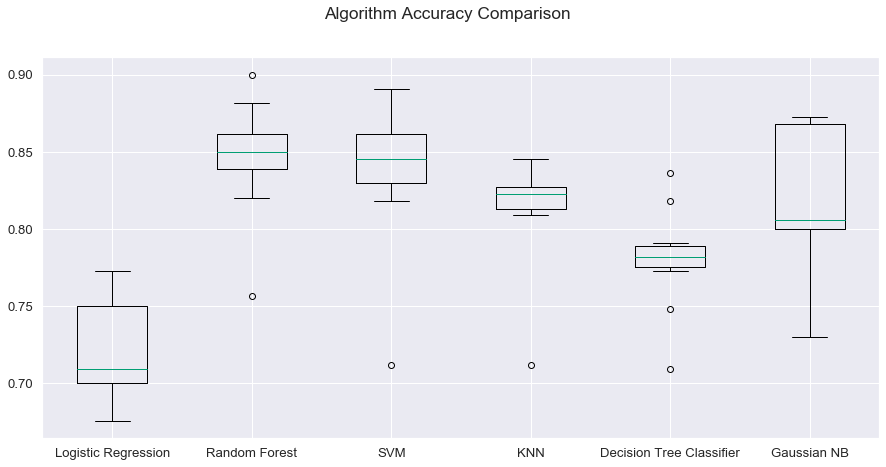

In [43]:
# Visualizaing the Accuracy of the models
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

As shown above, Random Forest has the highest accuracy followed by SVM and then KNN.
We are going to focus on Random Forests Random, as this model can handle a large number of numerical and categorical features, and is extremely helpful for estimating which of our variables are important for the prediction model.

## SMOTE (Synthetic Minority Over-sampling Technique) to oversample due to the skewness in target

Treating the imbalance of the dataset by implementing the SMOTE. 


In [44]:
from imblearn.over_sampling import SMOTE

oversampler=SMOTE(random_state=0)
smote_train, smote_train = oversampler.fit_sample(X_train,y_train)

In [45]:
smote_train.shape

(1848,)

In [46]:
X_train.shape

(1102, 16)

In [47]:
y_train.shape

(1102, 1)

In [48]:
X_train

,Age,DistanceFromHome,JobLevel,JobSatisfaction,MonthlyIncome,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,"DistanceFromHomeRange_(0, 10]","DistanceFromHomeRange_(10, 20]","DistanceFromHomeRange_(20, 30]"
443,22,4,1,3,3894,0,1,0,0,0,1,1,0,1,0,0
543,44,24,1,3,3708,0,1,0,0,0,1,1,0,0,0,1
1414,47,25,3,3,8633,0,1,0,0,0,1,1,0,0,0,1
303,31,7,2,4,6929,0,0,1,0,1,0,1,0,1,0,0
495,27,2,1,1,3041,0,0,1,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,35,27,1,1,2559,0,1,0,0,0,1,1,0,0,0,1
960,41,1,2,1,4103,0,0,1,1,0,0,1,0,1,0,0
1175,39,12,2,2,5295,0,1,0,0,1,0,1,0,0,1,0
1288,35,2,2,4,5762,0,1,0,1,0,0,1,0,1,0,0


In [49]:
y_train

,Attrition
443,1
543,0
1414,0
303,0
495,1
...,...
620,0
960,0
1175,0
1288,0


### Based on the standard models accuracy, we are now ready to start tweaking the hyperparameters to try to achieve better results

### Model 1. Random Forests

In [50]:
seed = 0   # We set our random seed to zero for reproducibility
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 30,                # tweaked from 20 to 70
#     'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(**rf_params)

rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [52]:
rf_predicted = rf.predict(X_test)
rf_predicted_proba = rf.predict_proba(X_test)

### Model 2. Naïve Bayes

In [53]:
import sklearn
from sklearn.naive_bayes import GaussianNB 

nb = GaussianNB()
nb.fit(X_train,y_train) 

nb_predicted = nb.predict(X_test)
nb_predicted_proba = nb.predict_proba(X_test)


# Showing the Train and Test datasets
print('Sizes for')
print(' X_train: ' ,len(X_train),   'X_test: ' , len(X_test), 'y_train:',len(y_train), 'y_test:', len(y_test))

Sizes for
 X_train:  1102 X_test:  368 y_train: 1102 y_test: 368


#### Scoring the Naive Bayes model

In [54]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, nb_predicted))

Accuracy: 0.8179347826086957


In [55]:
from sklearn.metrics import (accuracy_score, log_loss, classification_report)

print("Accuracy score: {}".format(accuracy_score(y_test, nb_predicted)))
print("="*80)
print(classification_report(y_test, nb_predicted))

Accuracy score: 0.8179347826086957
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       309
           1       0.43      0.41      0.42        59

    accuracy                           0.82       368
   macro avg       0.66      0.65      0.65       368
weighted avg       0.81      0.82      0.82       368



#### Scoring the Random Forests model

In [56]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, rf_predicted))

Accuracy: 0.8532608695652174


In [57]:
from sklearn.metrics import (accuracy_score, log_loss, classification_report)

print("Accuracy score: {}".format(accuracy_score(y_test, rf_predicted)))
print("="*80)
print(classification_report(y_test, rf_predicted))

Accuracy score: 0.8532608695652174
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       309
           1       0.86      0.10      0.18        59

    accuracy                           0.85       368
   macro avg       0.86      0.55      0.55       368
weighted avg       0.85      0.85      0.80       368



<b>Note:</b> By tweaking some of the hyperparameters we got an improved accuracy in Random Forests model

In [58]:
X_train.columns

Index(['Age', 'DistanceFromHome', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_No', 'OverTime_Yes',
       'DistanceFromHomeRange_(0, 10]', 'DistanceFromHomeRange_(10, 20]',
       'DistanceFromHomeRange_(20, 30]'],
      dtype='object')

In [59]:
importances = rf.feature_importances_
ds_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(16):
    feat = X_train.columns[i]
    coeff = importances[i]
    ds_param_coeff.loc[i] = (feat, coeff)
ds_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
ds_param_coeff = ds_param_coeff.reset_index(drop=True)
ds_param_coeff.head(15)

,Feature,Coefficient
0,MonthlyIncome,0.199084
1,OverTime_Yes,0.154285
2,Age,0.126252
3,MaritalStatus_Single,0.108426
4,OverTime_No,0.105973
5,JobLevel,0.077589
6,JobSatisfaction,0.051797
7,DistanceFromHome,0.042138
8,Department_Research & Development,0.039508
9,Department_Sales,0.022594


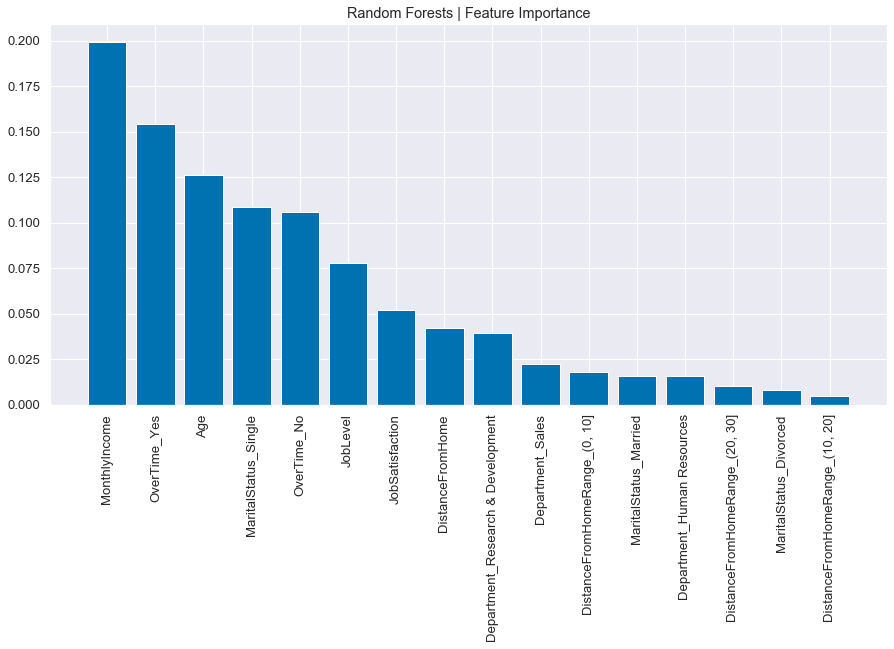

In [60]:
# Showing Random Forests feature importances
importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1] 

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices] 

# Create plot
plt.figure(figsize=(15, 7)) 
plt.title("Random Forests | Feature Importance") 
plt.bar(range(X_train.shape[1]), importances[indices]) 
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.show()

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rf_predicted)
cm

array([[308,   1],
       [ 53,   6]])

Text(64.5, 0.5, 'Truth')

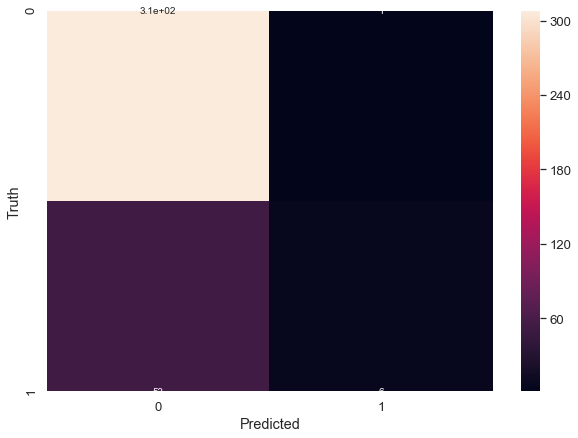

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Employee Attrition Simulator
The team has prepared an Employee Attrition Simulator so that anyone in the company can input a few variables and understand what is the current predicted risk of a certain employee leaving the company. 

### Checking Predictions

In [63]:
print('For the simulator to work, we need to input the following', data.shape[1], 'variables as shown below')

For the simulator to work, we need to input the following 16 variables as shown below


In [64]:
data.head(3)

,Age,DistanceFromHome,JobLevel,JobSatisfaction,MonthlyIncome,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,"DistanceFromHomeRange_(0, 10]","DistanceFromHomeRange_(10, 20]","DistanceFromHomeRange_(20, 30]"
0,41,1,2,4,5993,0,0,1,0,0,1,0,1,1,0,0
1,49,8,2,2,5130,0,1,0,0,1,0,1,0,1,0,0
2,37,2,1,3,2090,0,1,0,0,0,1,0,1,1,0,0


## Case 1: 

Assuming a 20-year old, living 3 km from home, from Job Level 1, with Job Satisfcation 3, 
Monthly Income of 2500 and working in the Sales department <b>doing overtime</b>.

In [65]:
# Assuming a 20-year old, living 25 km from home, from Job Level 1, with Job Satisfaction 2, 
# Monthly Income of 2500 and working in the Sales department doing overtime.

Scenario_1 = [[20,25,1,2,2500,0,0,1,0,0,1,0,1,0,0,1]]
# Predicting with Random Forests

Predictor_1 = rf.predict(Scenario_1)

# Predicting with Random Forests _proba
Predictor_1_proba = rf.predict_proba(Scenario_1)

# Predicting with Naive Bayes
Predictor_1_nb = nb.predict(Scenario_1)

# Predicting with Naive Bayes  _proba
Predictor_1_nb_proba = nb.predict_proba(Scenario_1)

print('Model -> Random Forests: Prediction for Employee to leave is : (No = 0, Yes = 1) ', Predictor_1)

print('Model -> Random Forests Prediction probability for Employee to leave is : ', Predictor_1_proba)

Model -> Random Forests: Prediction for Employee to leave is : (No = 0, Yes = 1)  [1]
Model -> Random Forests Prediction probability for Employee to leave is :  [[0.19118532 0.80881468]]


### Risk associated with employees that pass through the simulator: 
Between 0.5 and 0.65, we consider <b>low risk</b>
Between 0.65 and 0.8, we consider <b>Medium Risk</b>
Between 0.8 and 0.9, we consider <b>Very High risk</b>
Above 0.9 we consider <b>Extremely likely</b> that this employee will leave.

In [66]:
# Checking Probability when 0 (Attrition predicted to No)
No_proba_Predictor_1 = Predictor_1_proba[:,0]
No_proba_Predictor_1[0]
# Checking Probability when 1 (Attrition predicted to Yes)
Yes_proba_Predictor_1 = Predictor_1_proba[:,1]
Yes_proba_Predictor_1[0]


0.8088146789289783

In [67]:
Risk_Predictor1= {0 < Yes_proba_Predictor_1[0] <= 0.5: 'No Risk', 0.5< Yes_proba_Predictor_1[0] <= 0.65: 'Low Risk', 0.65 < Yes_proba_Predictor_1[0] <= 0.8: 'Medium Risk', 0.8 < Yes_proba_Predictor_1[0] <= 0.9: 'Very High Risk', 0.9 < Yes_proba_Predictor_1[0] <= 1:'Extremely Likely'}.get(True, Yes_proba_Predictor_1[0])

print('Probability of Leaving: {:1.1f}%'.format(Yes_proba_Predictor_1[0] *100),'represents a',Risk_Predictor1, 'of leaving the company')

Probability of Leaving: 80.9% represents a Very High Risk of leaving the company


######        

## Case 2: 

Assuming the same 20-year old, living 10 km from home, from Job Level 2, with Job Satisfcation 1, 
Monthly Income of 2500 and working in the Sales department but <b>not doing overtime</b>.

In [68]:
Scenario_2 = [[20,10,2,1,2500,0,0,1,0,0,1,1,0,1,0,0]]
# Predicting with Random Forests

Predictor_2 = rf.predict(Scenario_2)

# Predicting with Random Forests _proba
Predictor_2_proba = rf.predict_proba(Scenario_2)

# Predicting with Naive Bayes
Predictor_2_nb = nb.predict(Scenario_2)

# Predicting with Naive Bayes  _proba
Predictor_2_nb_proba = nb.predict_proba(Scenario_2)

print('Model -> Random Forests: Prediction for Employee to leave is : (No = 0, Yes = 1) ', Predictor_2)

print('Model -> Random Forests Prediction probability for Employee to leave is : ', Predictor_2_proba)


Model -> Random Forests: Prediction for Employee to leave is : (No = 0, Yes = 1)  [0]
Model -> Random Forests Prediction probability for Employee to leave is :  [[0.60414289 0.39585711]]


In [69]:
# Checking Probability when 0 (Attrition predicted to No)
No_proba_Predictor_2 = Predictor_2_proba[:,0]
No_proba_Predictor_2[0]
# Checking Probability when 1 (Attrition predicted to Yes)
Yes_proba_Predictor_2 = Predictor_2_proba[:,1]
Yes_proba_Predictor_2[0]

0.39585710510716415

In [70]:
Risk_Predictor2= {0 < Yes_proba_Predictor_2[0] <= 0.5: 'No Risk', 0.5< Yes_proba_Predictor_2[0] <= 0.65: 'Low Risk', 0.65 < Yes_proba_Predictor_2[0] <= 0.8: 'Medium Risk', 0.8 < Yes_proba_Predictor_2[0] <= 0.9: 'Very High Risk', 0.9 < Yes_proba_Predictor_2[0] <= 1:'Extremely Likely'}.get(True, Yes_proba_Predictor_2[0])

print('Probability of Leaving: {:1.1f}%'.format(Yes_proba_Predictor_2[0] *100),'represents a',Risk_Predictor2, 'of leaving the company')

Probability of Leaving: 39.6% represents a No Risk of leaving the company


######        

## Case 3: 

Assuming a 34-year old, living 11 km from home, from Job Level 1, with Job Satisfcation 1, 
Monthly Income of 2700 and working in the Sales department <b> and doing overtime</b>.

In [71]:
Scenario_3 = [[40,11,2,3,2800,0,0,1,0,0,1,0,1,0,1,0]]
# Predicting with Random Forests

Predictor_3 = rf.predict(Scenario_3)

# Predicting with Random Forests _proba
Predictor_3_proba = rf.predict_proba(Scenario_3)

# Predicting with Random Forests _proba
Predictor_3_nb = nb.predict(Scenario_3)

# Predicting with Random Forests _proba
Predictor_3_nb_proba = nb.predict_proba(Scenario_3)

print('Model -> Random Forests: Prediction for Employee to leave is : (No = 0, Yes = 1) ', Predictor_3)

print('Model -> Random Forests Prediction probability for Employee to leave is : ', Predictor_3_proba)

Model -> Random Forests: Prediction for Employee to leave is : (No = 0, Yes = 1)  [0]
Model -> Random Forests Prediction probability for Employee to leave is :  [[0.5497683 0.4502317]]


In [72]:
# Checking Probability when 0 (Attrition predicted to No)
No_proba_Predictor_3 = Predictor_3_proba[:,0]
No_proba_Predictor_3[0]
# Checking Probability when 1 (Attrition predicted to Yes)
Yes_proba_Predictor_3 = Predictor_3_proba[:,1]
Yes_proba_Predictor_3[0]


0.45023170245947747

In [73]:
Risk_Predictor3= {0 < Yes_proba_Predictor_3[0] <= 0.5: 'No Risk', 0.5< Yes_proba_Predictor_3[0] <= 0.65: 'Low Risk', 0.65 < Yes_proba_Predictor_3[0] <= 0.8: 'Medium Risk', 0.8 < Yes_proba_Predictor_3[0] <= 0.9: 'Very High Risk', 0.9 < Yes_proba_Predictor_3[0] <= 1:'Extremely Likely'}.get(True, Yes_proba_Predictor_3[0])

print('Probability of Leaving: {:1.1f}%'.format(Yes_proba_Predictor_3[0] *100),'represents a',Risk_Predictor3, 'of leaving the company')

Probability of Leaving: 45.0% represents a No Risk of leaving the company


######        

## Conclusions 
######     
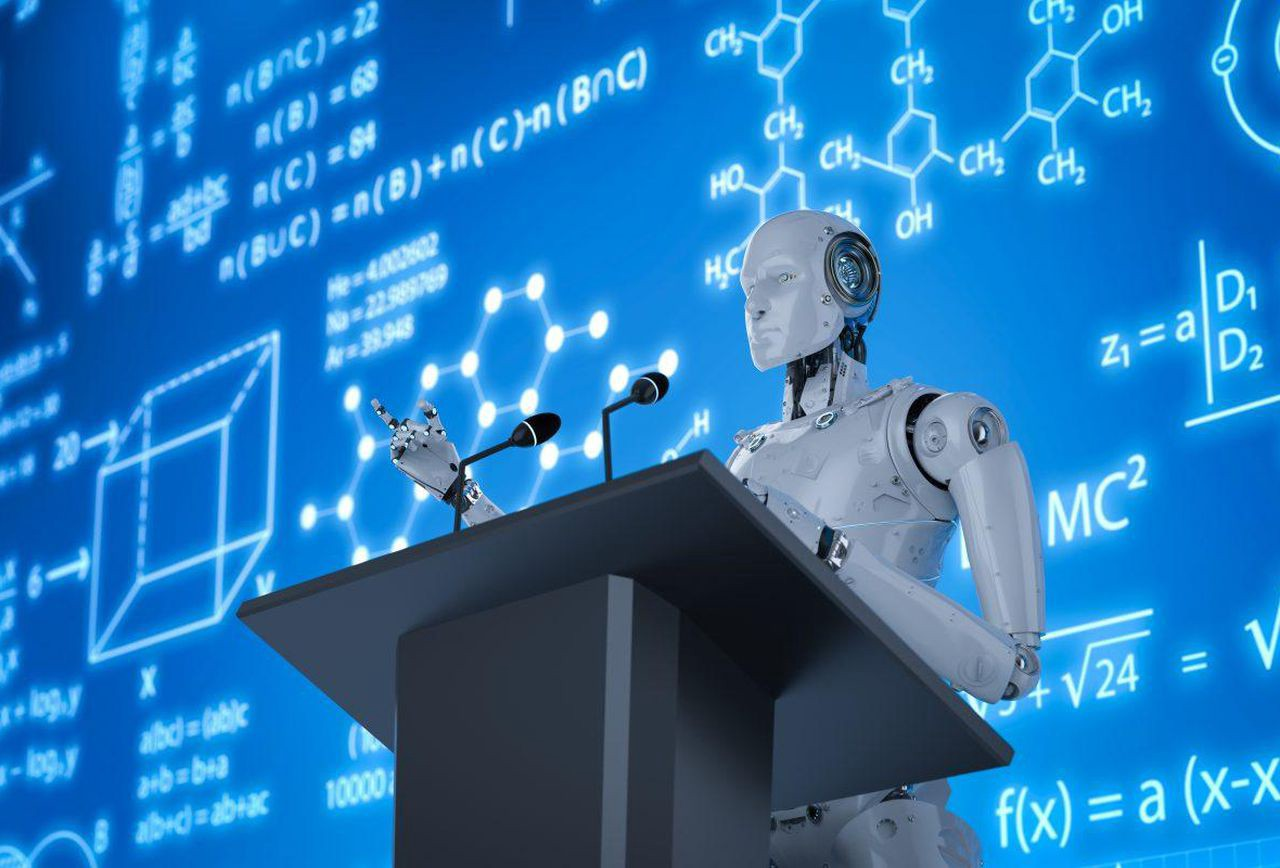

######  

## Model Explantion for Non-Technical People

The team applied several Machine Learning algorithms to understand which one would better predict attrition. 
After this exercise, one particular algorithm (Random Forests) stood out as being the most effective in predicting employee attrition. Random Forests is based on Decision Trees, if you really must know. ;-) 

There are a combination of factors that potentially drive employee attrition. Based on the best predictive model, here are the key take-aways from what we have learned: 

<b>Conclusion : High Attrition rates are seen in:</b>

Single employees, belonging to the "Sales Representive" for JobLevel 1
Sales Executives for JobLevels 2 and 3 and who have salary range of around 2500 to 3500

The prediction model takes into consideration the following percentages to predict employee attrition. These are called Features Importance.

<b>Tip on how to read the conclusions: </b>
Having a low MonthlyIncome is explained by a 20% importance, doing OverTime accounts for 15%, being Single accounts for 10,8% and so on. 
Remember that this is a combination of factors. Here are the Top 10 factors:
    
    Coefficient -> Feature:
    
    20  %  -> 'MonthlyIncome'
    15  %  -> 'OverTime_Yes'
    12,6%  -> 'Age'
    10,8%  -> 'MaritalStatus_Single'
    10,5 %  -> 'OverTime_No'
    7,7 %  -> 'JobLevel'
    5   %  -> 'JobSatisfaction'
    4,2 %  -> 'DistanceFromHome
    3,9   %  -> 'Department_Research & Development'
    2,2 %  -> 'Department_Sales'
    
    
As you can see, the % are decresing as we include more importance factors. This just shows that the MonthlyIncome, Age, Doing Overtime, DistanceFromHome and JobLevel account for more than 70% of combined factors that the predictive model uses. 

In other words, there is a higher probability of attrition when we see a combination of a low MonthlyIncome, young employees, that usually do OverTime, living within 10 km from work, within JobLevels 1 to 2 and that are Single.

Putting the model to practice, attrition rate is high in Employees that do Overtime and have a MonthylIncome of around 2500 € and belong to JobLevel 1 and 2.
Attrition probability rates are higher in "Sales" and "Research & Development" Departments, especially for JobLevel 1 on both departments.

DistanceFromHome does not seem to have a big impact on attrition as we can observe that there is a high attrition in JobLevel 1 in employees that live up to 10 km from home as well as above 10 km. In fact, it seems that there is a higher attrition on employees living closer to home (up to 10 km). It seems DistanceFromHome does not factor in too much.

## <b>Potencial Recomendations: </b>
- Lower MonthlyIncome have a higher probability of leaving:
    Recommendation: Do or revisit a Salary Market benchmarking exercise, with a special focus on JobLevel 1 and 2 for the Sales Department, as these are the combinations that the prediction model mentioned to be higher.  

- There is currently a 16% attrition rate for the period. While the rate is not extremely huge, there are associated costs (time and money) that come with it. 
    Recommendation: Assess the true figure of attrition and all its implications for the organization specifically with: Onboarding costs, learning curves, productivity costs for the less tenured employees, etc.). As this exercise may prove to be difficult, we suggest liaising with the Finance department to come up with standard agreed costs as a baseline for the exercise. 
    Would it make sense to to increase entry level Jobs (JobLevel 1 and 2) as a way to reduce employee attrition?

- There seems to be a high correlation between employees that do Overtime, especially within the Sales department. 

<b>Recommendation:</b> Rethink the following item: Is the company understaffed? Is OverTime really necessary, meaning a true need to extra hours? Is it promoted within the Sales department? Is OverTime a cultural topic and promoted within the company?
    Assess the true costs of OverTime vs the cost of having additional employee(s).
    
- Assess the true costs of Overtime.

- Would it make sense to increase staff and/or entry level salaries in a way to reduce employee attrition?